In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv('./Data/CTA_-_Ridership_-_Bus_Routes_-_Monthly_Day-Type_Averages___Totals.csv')

In [31]:
# Turn month_beginning to datetime data, and add a column for linear regression
df['Month_Beginning'] = pd.to_datetime(df['Month_Beginning'])
df.set_index('Month_Beginning',inplace=True)
df.sort_index(inplace=True)
df['days_from_start'] = (df.index - df.index[0]).days

In [32]:
df.head(10)

,route,routename,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal,days_from_start
Month_Beginning,,,,,,,
2001-01-01,1,Indiana/Hyde Park,6982.6,0.0,0.0,153617,0
2001-01-01,97,Skokie,3681.4,2066.7,1167.5,95096,0
2001-01-01,96,Lunt,1343.2,0.0,0.0,29550,0
2001-01-01,95W,West 95th,5162.6,4526.5,2556.7,144468,0
2001-01-01,95E,93rd-95th,5787.1,4530.5,3014.3,160511,0
2001-01-01,94,South California,10603.7,4792.6,3467.0,269786,0
2001-01-01,93,California/Dodge,2228.0,1057.5,0.0,53246,0
2001-01-01,92,Foster,7414.5,4123.2,2316.9,191196,0
2001-01-01,91,Austin,8583.5,4415.0,2384.8,218421,0


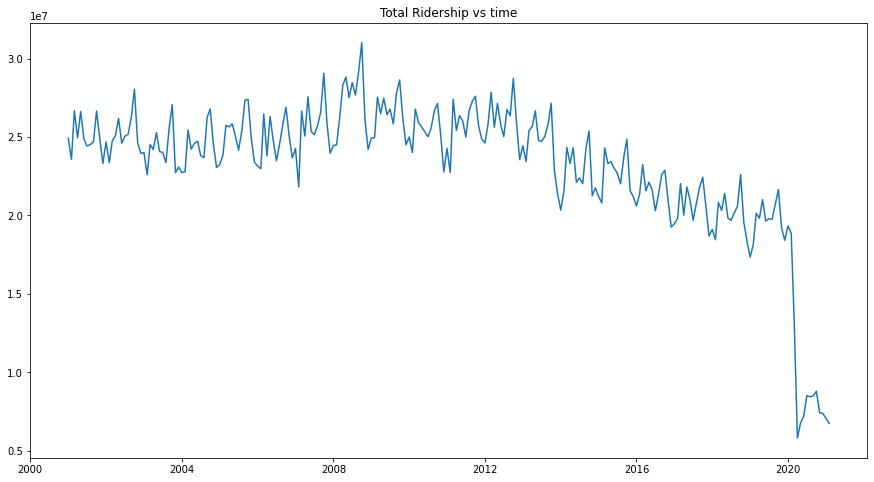

In [33]:
plt.figure(figsize=(15,8));
plt.title('Total Ridership vs time');
plt.plot(df.groupby('Month_Beginning').sum()[['MonthTotal']]);

# Filter out data after 2020
The pandemic shift the data entirely, which make predicting trendline impossible.

In [34]:
df_before_2020 = df[df.index < '2020-01-01'].copy()

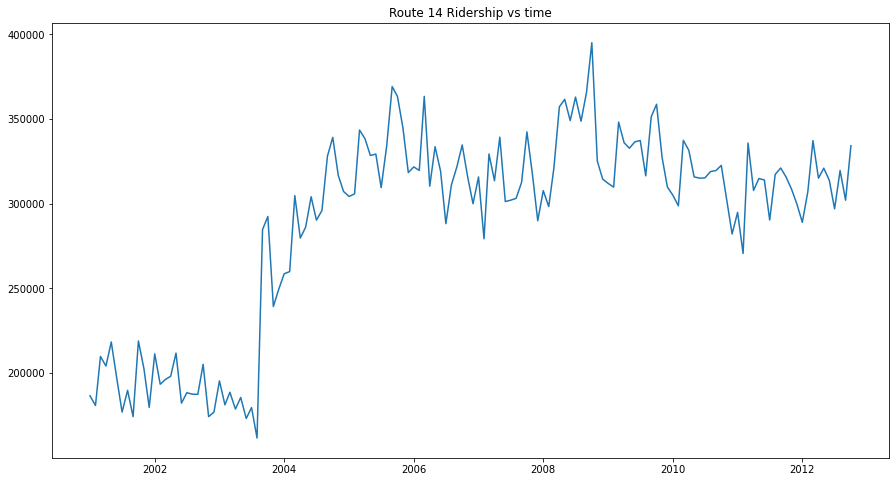

In [56]:
route_to_graph = '14'

plt.figure(figsize=(15,8));
plt.title(f'Route {route_to_graph} Ridership vs time');
plt.plot(df_before_2020[df_before_2020['route']==route_to_graph]['MonthTotal'].sort_index());

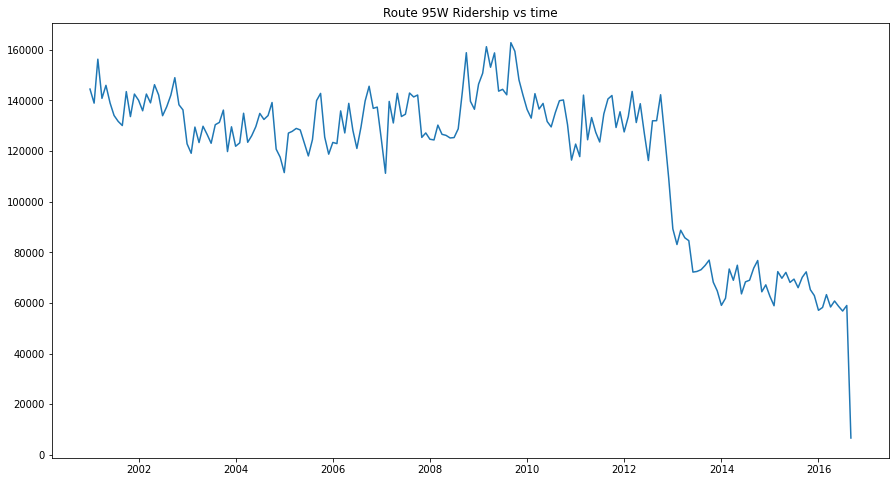

In [36]:
# Some route end before 2020
route_to_graph = '95W'

plt.figure(figsize=(15,8));
plt.title(f'Route {route_to_graph} Ridership vs time');
plt.plot(df_before_2020[df_before_2020['route']==route_to_graph]['MonthTotal'].sort_index());

In [37]:
# Fit the ridership into a linear regression model to find the slope
def get_demand(route):
    df_temp = df_before_2020[df_before_2020['route']==route].sort_index()
    lr = LinearRegression()
    lr.fit(np.array(df_temp['days_from_start']).reshape(-1,1),df_temp['MonthTotal'])
    return lr.coef_[0]

In [38]:
unique_route = set(df_before_2020['route'])
route_and_demand = {}
for route in unique_route:
    if df_before_2020[df_before_2020['route']==route].shape[0]>12*10:
        # Filter out route that operate less than 10 year
        route_and_demand[route] = get_demand(route)

In [39]:
demand_list = list(route_and_demand.values())
route_list = list(route_and_demand.keys())

In [40]:
# create a copy and sort to find the top demand route
demand_list_sorted = demand_list.copy()
demand_list_sorted.sort(reverse=True)
# The demand list is sorted from highest to lowest demand

# This will tell you the route number if you type in the demand index
route_list[demand_list.index(demand_list_sorted[1])]

'146'

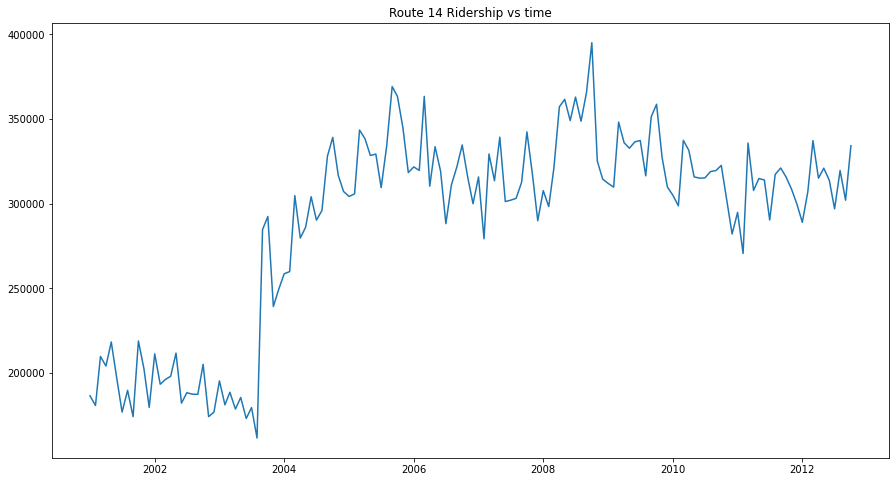

In [57]:
plt.figure(figsize=(15,8));
plt.title(f'Route {route_to_graph} Ridership vs time');
plt.plot(df_before_2020[df_before_2020['route']==route_list[demand_list.index(demand_list_sorted[0])]]['MonthTotal'].sort_index());

In [48]:
demand_df = pd.DataFrame(data = route_list,columns=['route'])
demand_df['demand'] = demand_list

In [54]:
demand_df.sort_values('demand',ascending=False,inplace=True)

In [55]:
demand_df.head()

,route,demand
29,14,32.158464
70,146,22.353699
95,147,13.782553
27,12,13.039129
6,18,12.670111
